In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series
from math import ceil
from pandas import get_dummies
from __future__ import division
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [380]:
datafram = pd.read_csv('game.csv', encoding="utf-8")
filtercolum = datafram[['Name','Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales','User_Score']]
dropemptycolum = filtercolum.dropna() .reset_index(drop=True)
filtercolum1 = dropemptycolum[dropemptycolum['Global_Sales'] < 1]

In [381]:
extractfeature=dropemptycolum[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales','User_Score']]
extractfeature['PopularGames'] = extractfeature['Global_Sales']
# extractfeature

In [382]:
extractfeature.drop('Global_Sales', axis=1, inplace=True)

In [383]:
def filtersales(x):
    if x >= 1:
        return 1
    else:
        return 0
    
def filterrate(x):
    if x >= 8:
        return 1
    elif x>=5 and x<8 :
        return 2
    elif x< 5:
        return 3

extractfeature['PopularGames'] = extractfeature['PopularGames'].apply(lambda x: filtersales(x))
extractfeature['User_Score'] = extractfeature['User_Score'].apply(lambda x: filterrate(x))

In [384]:
dumpfeatures = pd.get_dummies(extractfeature)

In [385]:
ytrainningset = dumpfeatures['PopularGames'].values
dumpfeatures1 = dumpfeatures.drop(['PopularGames'],axis=1)
xtrainningset  = dumpfeatures1.values

In [386]:
trainningx, testingx, trainningy, testingy = train_test_split(xtrainningset, ytrainningset, test_size=0.50, random_state=2)

In [387]:
def valid(x,y):
    count = 0 
#     print(len(x))
    for i in range(len(x)):
        if x[i] == y[i]:
            count = count + 1
#             print(count)
    vc = count/len(y)
    return vc

In [388]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(trainningx, trainningy)
pred=clf.predict(testingx)

In [389]:
randommodel = RandomForestClassifier(random_state=2).fit(Xtrain, ytrain)
randomy = randommodel.predict(testingx)

In [390]:
valid(pred,testingy)

0.8274213836477987

In [391]:
valid(randomy,testingy)

0.8510691823899371

In [392]:
importance = np.argsort(randommodel.feature_importances_)[::-1]

In [393]:
lista=[]
listb=[]
for f in range(20):
    lista.append(dumpfeatures1.columns[importance[f]])
    listb.append(randommodel.feature_importances_[importance[f]]*100)
    print("feature" ,dumpfeatures1.columns[importance[f]] ,"percentage" ,randommodel.feature_importances_[importance[f]]*100)



('feature', u'Critic_Score', 'percentage', 33.601481571870941)
('feature', u'Year_of_Release', 'percentage', 15.169452501255209)
('feature', u'Publisher_Nintendo', 'percentage', 3.1916749623361182)
('feature', u'Publisher_Electronic Arts', 'percentage', 2.155176638336938)
('feature', u'Genre_Action', 'percentage', 1.9728119873928676)
('feature', u'Platform_PC', 'percentage', 1.8728756294784314)
('feature', u'Genre_Sports', 'percentage', 1.7751395422654046)
('feature', u'Genre_Shooter', 'percentage', 1.7484232651704283)
('feature', u'Platform_PS3', 'percentage', 1.6865055553680115)
('feature', u'Platform_X360', 'percentage', 1.5592908605859601)
('feature', u'Publisher_Activision', 'percentage', 1.5439420865532016)
('feature', u'Platform_PS2', 'percentage', 1.4415303397524417)
('feature', u'Genre_Racing', 'percentage', 1.3967067931376098)
('feature', u'Platform_Wii', 'percentage', 1.2238007734277945)
('feature', u'Genre_Platform', 'percentage', 1.2142413156033438)
('feature', u'Genre_Rol

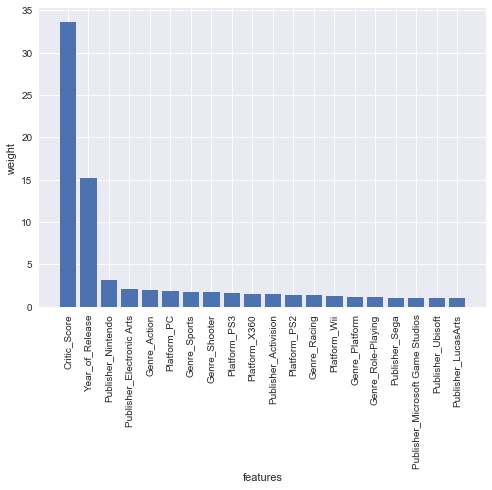

In [394]:
plt.figure(1)
index1 = np.arange(len(lista))
plt.bar(index1,listb)
plt.xticks(index1, lista,rotation=90)
plt.ylabel('weight')
plt.xlabel('features')
plt.show()

In [395]:
Candidategames = dumpfeatures[dumpfeatures['PopularGames'] == 0]

In [396]:
candidatey = Candidategames['PopularGames'].values

In [397]:
Candidategames = Candidategames.drop(['PopularGames'],axis=1)
candidatex = Candidategames.values

In [398]:
predpopular = randommodel.predict_proba(candidatex)

In [399]:
listc = []
listd =[]
listc = filtercolum1['Name'].values
listd = predpopular[:,1]

In [400]:
dict1 = {}
for a in range(len(listd)):
    dict1[listd[a]]= listc[a]
    
dict1

{0.0: u'15 Days',
 0.025000000000000001: u'Beat Down: Fists of Vengeance',
 0.040000000000000001: u'Legend of Kay',
 0.050000000000000003: u'Carmen Sandiego: The Secret of the Stolen Drums',
 0.066666666666666666: u'Need for Speed: Most Wanted',
 0.074999999999999997: u'Battlefield 2: Modern Combat',
 0.089999999999999997: u'Stolen',
 0.10000000000000001: u'Micro Machines V4',
 0.13333333333333333: u'The Saboteur',
 0.13999999999999999: u'Battle Assault 3 featuring Gundam Seed',
 0.14999999999999999: u'World Soccer Winning Eleven 8 International',
 0.16: u'NBA Live 2002',
 0.16666666666666666: u'Need for Speed: Hot Pursuit',
 0.18166666666666664: u'Robots',
 0.20000000000000001: u'Trine',
 0.20833333333333331: u'The Mummy: Tomb of the Dragon Emperor',
 0.23166666666666669: u'Buffy the Vampire Slayer: Chaos Bleeds',
 0.23333333333333331: u'The Sims 3: Generations',
 0.27500000000000002: u'Crash of the Titans',
 0.28999999999999998: u'Red Ninja: End of Honor',
 0.29999999999999999: u'Fas

In [401]:
list9=["Madden NFL 13","NHL 10","WipEout HD Fury","NHL 09","NHL 11","JoJos Bizarre Adventure: Eyes of Heaven"]
list8 = [90,83,80,78,75,73]
len(list8)

6

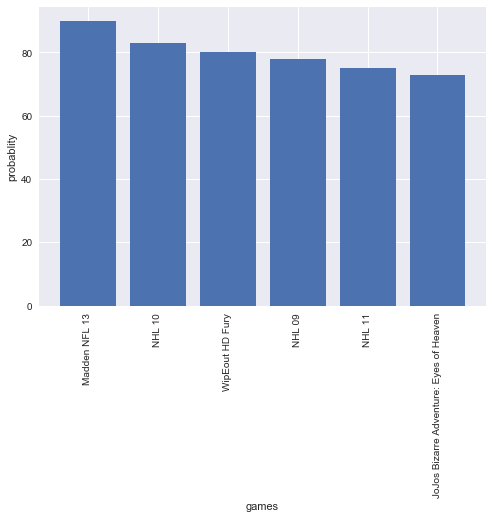

In [402]:
plt.figure(2)
index1 = np.arange(len(list9))
plt.bar(index1,list8)
plt.xticks(index1, list9,rotation=90)
plt.ylabel('probablity')
plt.xlabel('games')
plt.show()